In [11]:
import pandas as pd
import numpy as np
import os
import datetime
import time
import glob
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics 

#matplot lib notebooks display command
%matplotlib inline

#SET OPTIONS
pd.options.display.float_format = '{:,.2f}'.format
#GLOBAL VARIABLES
today = datetime.date.today()
#cwd = os.getcwd()

In [12]:
#load dataset
non_auto_df = pd.read_csv("../Data/non_automated_invoices_with_acct_info_sample.csv", encoding='utf-8')
non_auto_df.dtypes

INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY            int64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

# Feature cleaning

### CR_CHK_CD

In [13]:
for el in pd.unique(non_auto_df['CR_CHK_CD']):
    print(el)

Prepayment
Approved
0
Defer Revenue
Credit Data Not Found
Credit Hold
Payment Plan
Bankruptcy
Not Required
Write Off - Bad Debt


In [14]:
'''
Drop 0 values
'''

non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CR_CHK_CD'] == '0'].index)
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CR_CHK_CD'] == 'Bankruptcy'].index)
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CR_CHK_CD'] == 'Write Off - Bad Debt'].index)

### CUST_STAT

In [15]:
for el in pd.unique(non_auto_df['CUST_STAT']):
    print(el)

Direct Customer
Attrited Customer
Prospect
Indirect Customer


### INDUSTRY_NM

In [16]:
for el in pd.unique(non_auto_df['INDUSTRY_NM']):
    print(el)


Agriculture & Mining
Healthcare & Life Sciences
Retail & CG
Manufacturing
Communications & Media
Engineering, Construction, & Real Estate
High Tech
Financial Services
Professional Services
Education
Public Sector
Other
Travel, Transportation, & Hospitality
0
High-Tech Software/Services
Energy & Utilities
Professional_Services
Health_Care
High_Tech
Higher Education
Software & Programming
Communications
Computer Services
Media & Telecom
Nonprofit Institutions
Financial_Services
Consumer Products & Retail
Technology - Software & Services
Consulting
Media & Communications
Communications Services


In [17]:
'''
Drop 0 values
'''

non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == '0'].index)
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == '0']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT


In [18]:
'''
“Communications & Media” ==== “Media & Communications” === “Media” ====“Media & Telecom”===“Communications Services”====“ITTelecoms” = “Media & Telecom” = “IT／通信”
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'IT／通信']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Telecom']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Communications & Media']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Communications']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Media & Telecom']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Communications Services']='Media_and_Telecom'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'ITTelecoms']='Media_and_Telecom'

In [19]:
'''
Healthcare and Life Sciences = “Health_Care” = Healthcare & Life Sciences = Healthcare
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare and Life Sciences']='Health_Care'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare & Life Sciences']='Health_Care'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Healthcare']='Health_Care'


In [20]:
'''
Retail and CG = Consumer Products & Retail = Retail & Consumer Goods = “Retail_Consumer” == Retail & CG
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail and CG']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Consumer Products & Retail']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail & Consumer Goods']='Retail_Consumer'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Retail & CG']='Retail_Consumer'



In [21]:
'''
Financial Services = Financial_Services
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Financial Services']='Financial_Services'


In [22]:
'''
Public sector == “Public Sector & Government” === Public Sector and Government ==== Public_Sector == Public Sector
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector & Government']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector and Government']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public_Sector']='Public sector'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Public Sector']='Public sector'

In [23]:
'''
“High_Tech” === “High-Tech Software/Services” == “Computer Software”. === 
“Computer hardware/software/technology” == “Software & Programming” === “Technology - Software & Services”
==== Software & Technology === High Tech === Technology === Computer Services
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'High-Tech Software/Services']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer Software']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer hardware/software/technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Software & Programming']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Technology - Software & Services']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Software & Technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'High Tech']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Technology']='High_Tech'
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Computer Services']='High_Tech'

In [24]:
'''
“Professional Services” = “Professional_Services”
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Professional Services']='Professional_Services'


In [25]:
'''
Education ==== Higher Education
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Higher Education']='Education'


In [26]:
'''
Travel, Transportation, & Hospitality======Hospitality, Travel, & Transportation
'''
non_auto_df.loc[lambda df: df['INDUSTRY_NM'] == 'Travel, Transportation, & Hospitality']='Hospitality, Travel, & Transportation'

In [27]:
for el in pd.unique(non_auto_df['INDUSTRY_NM']):
    print(el)


Agriculture & Mining
Health_Care
Retail_Consumer
Manufacturing
Media_and_Telecom
Engineering, Construction, & Real Estate
High_Tech
Financial_Services
Professional_Services
Education
Public sector
Other
Hospitality, Travel, & Transportation
Energy & Utilities
Communications
Nonprofit Institutions
Consulting


### CRNCY_ISO_CD

In [28]:

for el in pd.unique(non_auto_df['CRNCY_ISO_CD']):
    print(el)


USD
Health_Care
Retail_Consumer
Media_and_Telecom
High_Tech
Financial_Services
EUR
JPY
Professional_Services
Public sector
Hospitality, Travel, & Transportation
GBP
AUD
CAD
SEK
Education


In [29]:
non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
1,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
7,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
24,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
56,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
62,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97223,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97262,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97263,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care
97290,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,...,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care,Health_Care


In [30]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care'].index)

In [31]:
non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Health_Care']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT


In [32]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Retail_Consumer'].index)

In [33]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Financial_Services'].index)

In [34]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Public sector'].index)

In [35]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Media_and_Telecom'].index)

In [36]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'High_Tech'].index)

In [37]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Professional_Services'].index)

In [38]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Hospitality, Travel, & Transportation'].index)

In [39]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['CRNCY_ISO_CD'] == 'Education'].index)

In [40]:

for el in pd.unique(non_auto_df['CRNCY_ISO_CD']):
    print(el)


USD
EUR
JPY
GBP
AUD
CAD
SEK


### COLLECTION_STATUS

In [41]:

for el in pd.unique(non_auto_df['COLLECTION_STATUS']):
    print(el)


Non Responsive
Promise To Pay
NONE
Willingness To Pay
Courtesy Contact
Refusal To Pay
Non-Responsive
Invoice Correction Required
E-invoicing
Tax
Red Account
Financial Inability To Pay


In [42]:
'''
Non Responsive ==== Non-Responsive
'''
non_auto_df.loc[lambda df: df['COLLECTION_STATUS'] == 'Non Responsive']='Non-Responsive'


In [43]:
non_auto_df.loc[lambda df: df['COLLECTION_STATUS'] == 'Tax']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
4335,a2d0M000001xeqfQAA,0013000000rpFcOAAU,Approved,Direct Customer,200.00,Manufacturing,39,82,82.00,50,...,CO,English,Net30,Wire Transfer,True,False,True,168,USD,"2,758.75"
7977,a2d0M000002HbhQQAS,0010M00001WOWtWQAX,Credit Data Not Found,Direct Customer,0.00,Manufacturing,67,20,87.00,4800,...,CO,English,Net60,Wire Transfer,True,False,True,149,USD,"16,338.78"
8643,a2d0M000001mvArQAI,0013000000I49uoAAB,Approved,Attrited Customer,195.00,Education,0,0,15.00,200,...,CO,Spanish,Net30,Wire Transfer,True,False,True,62,USD,"2,298.00"
10195,a2d0M000001ozZMQAY,0013000000LlznfAAB,Approved,Direct Customer,180.00,"Engineering, Construction, & Real Estate",15,75,41.00,1538,...,BR,English,Net30,Wire Transfer,True,False,True,47,USD,"1,195.46"
11337,a2d0M000002LmGMQA0,0013000000LzDhlAAF,Defer Revenue,Direct Customer,129.00,Manufacturing,119,70,62.00,950,...,IL,English,Net30,Wire Transfer,True,False,True,43,USD,868.55
11647,a2d0M000001wUBfQAM,0013000000rpU8VAAU,Approved,Direct Customer,185.00,Manufacturing,320,62,62.00,2500,...,MX,English,Net30,Check,True,False,True,221,USD,"42,906.36"
20094,a2d0M000001giuqQAA,0013000000ZlQwbAAF,Approved,Direct Customer,60.00,Manufacturing,629,47,61.00,2500,...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,True,99,USD,"71,927.40"
20515,a2d0M000002mfQhQAI,0013000000rp7uwAAA,Prepayment,Attrited Customer,10.00,"Engineering, Construction, & Real Estate",0,0,61.00,120,...,BR,Portuguese (Brazilian),Net30,Wire Transfer,True,False,True,32,USD,"8,514.09"
23877,a2d0M000001oaJ1QAI,0013000000I3uFfAAJ,Approved,Direct Customer,81.00,Manufacturing,125,64,86.00,124849,...,PE,English,Net45,Wire Transfer,True,False,True,124,USD,"28,895.97"
24565,a2d0M000002DEnCQAW,0013000000rpFcOAAU,Approved,Direct Customer,200.00,Manufacturing,39,82,82.00,50,...,CO,English,Net30,Wire Transfer,True,False,True,327,USD,"2,758.75"


### ESCALATION_STATUS

In [44]:


for el in pd.unique(non_auto_df['ESCALATION_STATUS']):
    print(el)


Non-Responsive
NONE
Pending AE Response/Involvement
Awaiting AE Involvement/Action
Assigned To Bad Debt
Escalated To Order Management


In [45]:
non_auto_df.loc[lambda df: df['ESCALATION_STATUS'] == 'Assigned To Bad Debt']

,INVOICE_ID,ACCT_ID,CR_CHK_CD,CUST_STAT,PYDX_SCRE_NUM,INDUSTRY_NM,CURR_NUM_LICENSES,TRUE_LOGIN,USAGE_SCORE,EMP_CNT,...,BILLING_COUNTRY,BILLING_LANGUAGE,PAYMENT_TERM,PAYMENT_TYPE,HAS_30DAY_EXTXN,PAST_DUE_FLG,LATE_PMT_GT_30,DAYS_TO_PAY,CURRENCY_CODE,TOTAL_AMOUNT
54801,a2d0M000002Go1IQAS,0010M00001UEg5aQAD,Prepayment,Prospect,10.00,Manufacturing,0,0,86.00,50,...,US,English,Net30,Check,True,False,True,126,USD,"13,325.99"


In [46]:
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['ESCALATION_STATUS'] == 'Assigned To Bad Debt'].index)

### BILLING_COUNTRY

In [47]:

for el in pd.unique(non_auto_df['BILLING_COUNTRY']):
    print(el)

Non-Responsive
US
GB
JP
AU
BR
TH
IT
IN
CA
ES
IL
BE
DE
NL
HK
DK
CH
FR
CL
SA
TW
AT
CN
MX
FI
IE
ZA
PL
NZ
PT
AE
SG
RO
CO
LU
DO
AR
HU
CZ
HR
SE
MY
MT
LI
RU
KR
NO
CR
CY
ID
PE
PK
LB
LK
GR
JE
QA
TR
KE
NG
SI
PH
PR
SK
MA
TZ
IS
EG
LS
VE
TN
SN
UG
EC


### BILLING_LANGUAGE 

In [48]:

for el in pd.unique(non_auto_df['BILLING_LANGUAGE']):
    print(el)


Non-Responsive
English
Japanese
Italian
Spanish
German
French
Chinese (Simplified)
Portuguese (Brazilian)
Dutch


### PAYMENT_TERM 

In [49]:

for el in pd.unique(non_auto_df['PAYMENT_TERM']):
    print(el)

Non-Responsive
Net30
Net60
Net30EOM
Net45
Net0
Net60EOM


### PAYMENT_TYPE

In [50]:

for el in pd.unique(non_auto_df['PAYMENT_TYPE']):
    print(el)

Non-Responsive
Check
Wire Transfer


### CURRENCY_CODE

In [51]:
'''
IS this redundant with CurrencyISO?
'''
for el in pd.unique(non_auto_df['CURRENCY_CODE']):
    print(el)

Non-Responsive
USD
GBP
JPY
AUD
EUR
CAD
SEK


In [52]:
### DAYS_TO_PAY

In [53]:
for el in pd.unique(non_auto_df['DAYS_TO_PAY']):
    print(el)

Non-Responsive
95
-59
5
10
-9
8
51
79
11
123
-12
15
12
19
29
-1
6
2
-3
16
1
-25
84
61
53
3
13
55
20
70
9
4
-20
37
67
42
26
32
34
113
33
-2
-27
65
-23
21
45
39
7
56
41
528
14
44
210
38
62
35
63
179
36
40
52
-4
68
251
112
25
-5
-6
-11
48
23
17
0
49
-13
121
81
18
-17
60
160
54
246
77
203
27
59
22
-35
24
74
143
92
91
73
93
71
30
72
-19
-10
87
86
89
120
180
-16
149
47
-8
50
147
130
28
125
-18
46
111
99
168
148
105
126
-7
153
82
-14
76
140
78
31
-22
190
-30
100
98
103
117
43
144
109
97
135
193
136
292
101
58
173
57
-26
-44
119
138
315
145
132
-24
108
129
96
-21
85
66
-33
202
-15
75
169
-45
277
114
154
-28
221
280
137
253
281
234
268
146
155
64
122
128
116
164
88
-43
191
-42
240
80
83
167
350
216
104
102
171
-34
187
241
214
69
94
184
141
106
157
269
-37
124
327
-31
222
185
332
183
110
166
192
257
199
174
186
156
133
195
392
176
219
115
-40
198
151
224
-29
90
118
170
178
-32
107
261
340
177
188
209
134
-36
211
196
152
258
142
-49
161
182
201
259
226
323
444
247
228
232
208
-39
376
305
172
274


In [54]:
# CUTOFF AT 270 days (9 months) and non-responsive 
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['DAYS_TO_PAY'] == 'Non-Responsive'].index)
non_auto_df = non_auto_df.drop(index = non_auto_df.loc[lambda df: df['DAYS_TO_PAY'] >270].index)

In [55]:
for el in pd.unique(non_auto_df['DAYS_TO_PAY']):
    print(el)

95
-59
5
10
-9
8
51
79
11
123
-12
15
12
19
29
-1
6
2
-3
16
1
-25
84
61
53
3
13
55
20
70
9
4
-20
37
67
42
26
32
34
113
33
-2
-27
65
-23
21
45
39
7
56
41
14
44
210
38
62
35
63
179
36
40
52
-4
68
251
112
25
-5
-6
-11
48
23
17
0
49
-13
121
81
18
-17
60
160
54
246
77
203
27
59
22
-35
24
74
143
92
91
73
93
71
30
72
-19
-10
87
86
89
120
180
-16
149
47
-8
50
147
130
28
125
-18
46
111
99
168
148
105
126
-7
153
82
-14
76
140
78
31
-22
190
-30
100
98
103
117
43
144
109
97
135
193
136
101
58
173
57
-26
-44
119
138
145
132
-24
108
129
96
-21
85
66
-33
202
-15
75
169
-45
114
154
-28
221
137
253
234
268
146
155
64
122
128
116
164
88
-43
191
-42
240
80
83
167
216
104
102
171
-34
187
241
214
69
94
184
141
106
157
269
-37
124
-31
222
185
183
110
166
192
257
199
174
186
156
133
195
176
219
115
-40
198
151
224
-29
90
118
170
178
-32
107
261
177
188
209
134
-36
211
196
152
258
142
-49
161
182
201
259
226
247
228
232
208
-39
172
131
205
243
213
162
236
-53
139
270
-46
158
159
207
150
206
181
218
165
175
217

## Change back to correct dtypes

In [56]:
non_auto_df.dtypes

INVOICE_ID           object
ACCT_ID              object
CR_CHK_CD            object
CUST_STAT            object
PYDX_SCRE_NUM        object
INDUSTRY_NM          object
CURR_NUM_LICENSES    object
TRUE_LOGIN           object
USAGE_SCORE          object
EMP_CNT              object
CRNCY_ISO_CD         object
CUSTOMER_REVENUE     object
COLLECTOR            object
COLLECTION_STATUS    object
HAS_TAX_EXEMP        object
ESCALATION_STATUS    object
BILLING_COUNTRY      object
BILLING_LANGUAGE     object
PAYMENT_TERM         object
PAYMENT_TYPE         object
HAS_30DAY_EXTXN      object
PAST_DUE_FLG         object
LATE_PMT_GT_30       object
DAYS_TO_PAY          object
CURRENCY_CODE        object
TOTAL_AMOUNT         object
dtype: object

Should be: 
    
INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY            int64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

In [57]:
'''
Recast after modifying
'''
non_auto_df.loc[:,'PYDX_SCRE_NUM'] = non_auto_df.loc[:,'PYDX_SCRE_NUM'].astype('float64')
non_auto_df[['PYDX_SCRE_NUM', 'CURR_NUM_LICENSES', 'TRUE_LOGIN', 'USAGE_SCORE',\
             'EMP_CNT', 'CUSTOMER_REVENUE','DAYS_TO_PAY', 'TOTAL_AMOUNT' \
            ]] = non_auto_df[['PYDX_SCRE_NUM', 'CURR_NUM_LICENSES', 'TRUE_LOGIN', \
                              'USAGE_SCORE', 'EMP_CNT', 'CUSTOMER_REVENUE','DAYS_TO_PAY', 'TOTAL_AMOUNT'\
            ]].astype('float64')

non_auto_df[['HAS_TAX_EXEMP', 'HAS_30DAY_EXTXN', 'PAST_DUE_FLG', 'LATE_PMT_GT_30']] = \
non_auto_df[['HAS_TAX_EXEMP', 'HAS_30DAY_EXTXN', 'PAST_DUE_FLG', 'LATE_PMT_GT_30']].astype('bool')
non_auto_df.dtypes

INVOICE_ID            object
ACCT_ID               object
CR_CHK_CD             object
CUST_STAT             object
PYDX_SCRE_NUM        float64
INDUSTRY_NM           object
CURR_NUM_LICENSES    float64
TRUE_LOGIN           float64
USAGE_SCORE          float64
EMP_CNT              float64
CRNCY_ISO_CD          object
CUSTOMER_REVENUE     float64
COLLECTOR             object
COLLECTION_STATUS     object
HAS_TAX_EXEMP           bool
ESCALATION_STATUS     object
BILLING_COUNTRY       object
BILLING_LANGUAGE      object
PAYMENT_TERM          object
PAYMENT_TYPE          object
HAS_30DAY_EXTXN         bool
PAST_DUE_FLG            bool
LATE_PMT_GT_30          bool
DAYS_TO_PAY          float64
CURRENCY_CODE         object
TOTAL_AMOUNT         float64
dtype: object

In [58]:
#Normalize Numeric fields

def pre_process(df, dropcols=None):
    '''
    The pre_process function that will return a transformed dataframe
    Notes:
        1) dropcols should be a list
        2) integer varibles are transformed using mean normalization
    '''
    #drop columns input by the user
    if dropcols is not None:
        df = df.drop(columns=dropcols)
    print("columns dropped")
    
    #loop through remaining columns and apply the appropreate transform
    for i in df.columns:
        print(i)
        '''
        #mean normalization for int variables
        if df[i].dtype == "int64" or df[i].dtype == 'float64':
            mean = df[i].mean()
            if (df[i].max() - df[i].min()) == 0:
                denom = 1
                print("useless int column", i)
                break
            else:
                denom = (df[i].max() - df[i].min())
            df[i] = df[i].apply(lambda x: float(x - mean) / denom)
        '''
        #convert bool values to 1 and 0
        if df[i].dtype == "bool":
            df[i] = df[i].map({True: 1, False: 0})
        elif df[i].dtype == "object":
            df = pd.get_dummies(df, columns=[i], prefix = [i], dtype="int8") #, sparse=True
        
    return df



In [59]:
print("executed")
clean_df = pre_process(non_auto_df, dropcols=['INVOICE_ID', 'ACCT_ID', 'COLLECTOR'])
#clean_df.to_csv('../Data/clean_df.csv')
#dtypes_df = clean_df.dtypes.to_frame('dtypes').reset_index()
#dtypes_df.to_csv('../Data/clean_dtypes.csv')
print("done")

executed
columns dropped
CR_CHK_CD
CUST_STAT
PYDX_SCRE_NUM
INDUSTRY_NM
CURR_NUM_LICENSES
TRUE_LOGIN
USAGE_SCORE
EMP_CNT
CRNCY_ISO_CD
CUSTOMER_REVENUE
COLLECTION_STATUS
HAS_TAX_EXEMP
ESCALATION_STATUS
BILLING_COUNTRY
BILLING_LANGUAGE
PAYMENT_TERM
PAYMENT_TYPE
HAS_30DAY_EXTXN
PAST_DUE_FLG
LATE_PMT_GT_30
DAYS_TO_PAY
CURRENCY_CODE
TOTAL_AMOUNT
done


In [60]:
clean_df.to_csv('../Data/clean_df.csv')
print("done")

done


In [61]:

X = clean_df.loc[:, clean_df.columns != "DAYS_TO_PAY"]
y = clean_df['DAYS_TO_PAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print("done")

done


# Linear Regression for accross all DAYS_TO_PAY

executed start
Model using 0.2 as the regularization coefficient completed in 0.05sec
Model using 0.21000000000000002 as the regularization coefficient completed in 0.064sec
Model using 0.22000000000000003 as the regularization coefficient completed in 0.07sec
Model using 0.23000000000000004 as the regularization coefficient completed in 0.071sec
Model using 0.24000000000000005 as the regularization coefficient completed in 0.07sec
Model using 0.25000000000000006 as the regularization coefficient completed in 0.072sec
Model using 0.26000000000000006 as the regularization coefficient completed in 0.07sec
Model using 0.2700000000000001 as the regularization coefficient completed in 0.065sec
Model using 0.2800000000000001 as the regularization coefficient completed in 0.067sec
Model using 0.2900000000000001 as the regularization coefficient completed in 0.073sec


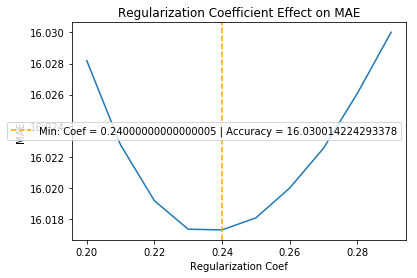

done


In [62]:

#Ridge Regression
print("executed start")
reg_coef_list = np.arange(.2, .3, .01) #np.concatenate( (np.arange(0.05, 1.0, 0.05),np.arange(1, 10.0, 1)), axis=None) 
mae_list = []

for coef in reg_coef_list:
    start = time.process_time()
    linreg = linear_model.Ridge(normalize = True, alpha=coef, max_iter=5000)
    linreg.fit(X=X_train, y=y_train)
    y_pred = linreg.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, y_pred)
    mae_list.append(mae)
    end = time.process_time()
    print('Model using '+str(coef)+' as the regularization coefficient completed in '+str(round(end-start,3))+'sec')

plt.plot(reg_coef_list, mae_list)
plt.axvline(x=reg_coef_list[mae_list.index(min(mae_list))], color='orange', linestyle='--', 
            label='Min: Coef = {}'.format(reg_coef_list[mae_list.index(min(mae_list))])+' | Accuracy = {}'.format(max(mae_list)))
plt.title("Regularization Coefficient Effect on MAE")
plt.xlabel("Regularization Coef")
plt.ylabel("MAE")
plt.legend()
plt.show()
print("done")

Accuracy Range for Linear Regression is: 15 days


# Linear Regression Across Just Late Days

In [63]:
clean_df1 = clean_df.drop(index = clean_df.loc[lambda df: df['DAYS_TO_PAY'] < 0].index)
for el in pd.unique(clean_df1['DAYS_TO_PAY']):
    print(el)

95.0
5.0
10.0
8.0
51.0
79.0
11.0
123.0
15.0
12.0
19.0
29.0
6.0
2.0
16.0
1.0
84.0
61.0
53.0
3.0
13.0
55.0
20.0
70.0
9.0
4.0
37.0
67.0
42.0
26.0
32.0
34.0
113.0
33.0
65.0
21.0
45.0
39.0
7.0
56.0
41.0
14.0
44.0
210.0
38.0
62.0
35.0
63.0
179.0
36.0
40.0
52.0
68.0
251.0
112.0
25.0
48.0
23.0
17.0
0.0
49.0
121.0
81.0
18.0
60.0
160.0
54.0
246.0
77.0
203.0
27.0
59.0
22.0
24.0
74.0
143.0
92.0
91.0
73.0
93.0
71.0
30.0
72.0
87.0
86.0
89.0
120.0
180.0
149.0
47.0
50.0
147.0
130.0
28.0
125.0
46.0
111.0
99.0
168.0
148.0
105.0
126.0
153.0
82.0
76.0
140.0
78.0
31.0
190.0
100.0
98.0
103.0
117.0
43.0
144.0
109.0
97.0
135.0
193.0
136.0
101.0
58.0
173.0
57.0
119.0
138.0
145.0
132.0
108.0
129.0
96.0
85.0
66.0
202.0
75.0
169.0
114.0
154.0
221.0
137.0
253.0
234.0
268.0
146.0
155.0
64.0
122.0
128.0
116.0
164.0
88.0
191.0
240.0
80.0
83.0
167.0
216.0
104.0
102.0
171.0
187.0
241.0
214.0
69.0
94.0
184.0
141.0
106.0
157.0
269.0
124.0
222.0
185.0
183.0
110.0
166.0
192.0
257.0
199.0
174.0
186.0
156.0
133.0
195.0
176.0

In [64]:
X = clean_df1.loc[:, clean_df1.columns != "DAYS_TO_PAY"]
y = clean_df1['DAYS_TO_PAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
print("done")

done


executed start
Model using 0.15 as the regularization coefficient completed in 0.034sec
Model using 0.155 as the regularization coefficient completed in 0.035sec
Model using 0.16 as the regularization coefficient completed in 0.059sec
Model using 0.165 as the regularization coefficient completed in 0.057sec
Model using 0.17 as the regularization coefficient completed in 0.059sec
Model using 0.17500000000000002 as the regularization coefficient completed in 0.058sec
Model using 0.18000000000000002 as the regularization coefficient completed in 0.06sec
Model using 0.18500000000000003 as the regularization coefficient completed in 0.06sec
Model using 0.19000000000000003 as the regularization coefficient completed in 0.061sec
Model using 0.19500000000000003 as the regularization coefficient completed in 0.055sec
Model using 0.20000000000000004 as the regularization coefficient completed in 0.061sec
Model using 0.20500000000000004 as the regularization coefficient completed in 0.059sec
Mode

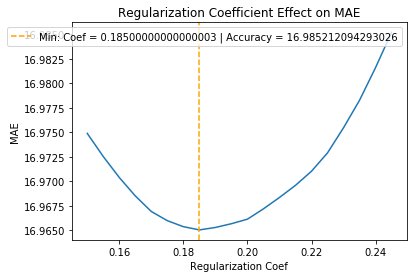

done


In [65]:

#Ridge Regression
print("executed start")
reg_coef_list = np.arange(.15, .25, .005) #np.concatenate( (np.arange(0.05, 1.0, 0.05),np.arange(1, 10.0, 1)), axis=None) 
mae_list = []

for coef in reg_coef_list:
    start = time.process_time()
    linreg = linear_model.Ridge(normalize = True, alpha=coef, max_iter=5000)
    linreg.fit(X=X_train, y=y_train)
    y_pred = linreg.predict(X_valid)
    mae = metrics.mean_absolute_error(y_valid, y_pred)
    mae_list.append(mae)
    end = time.process_time()
    print('Model using '+str(coef)+' as the regularization coefficient completed in '+str(round(end-start,3))+'sec')

plt.plot(reg_coef_list, mae_list)
plt.axvline(x=reg_coef_list[mae_list.index(min(mae_list))], color='orange', linestyle='--', 
            label='Min: Coef = {}'.format(reg_coef_list[mae_list.index(min(mae_list))])+' | Accuracy = {}'.format(max(mae_list)))
plt.title("Regularization Coefficient Effect on MAE")
plt.xlabel("Regularization Coef")
plt.ylabel("MAE")
plt.legend()
plt.show()
print("done")

Accuracy Range is 16 days

# SVR Test

In [ ]:
import sklearn.svm as svm
import sklearn.metrics as metrics
print("executed")
#below code from sklearn documentaion
# #############################################################################
# Fit regression model
svr_rbf = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
#end documentation code

print("svrs created")
clf_rbf = svr_rbf.fit(X_train, y_train)
clf_lin = svr_lin.fit(X_train, y_train)
clf_poly = svr_poly.fit(X_train, y_train)
print("classifiers created")
pred_rbf = svr_rbf.predict(X_valid)
pred_lin = svr_lin.predict(X_valid)
pred_poly = svr_poly.predict(X_valid)


print("Mean absolute error with rbf kernel is ", metrics.mean_absolute_error(y_valid, pred_rbf))
print("Mean absolute error with linear kernel is ", metrics.mean_absolute_error(y_valid, pred_lin))
print("Mean absolute error with polynomial kernel is ", metrics.mean_absolute_error(y_valid, pred_poly))

executed
svrs created
